In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib 

Using matplotlib backend: Qt5Agg


In [14]:
data = pd.read_csv('crx_data.csv', header=None, na_values='?')

In [15]:
data.shape

(690, 16)

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [17]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [18]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [19]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [20]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


В таблице для каждого категориального признака приведено общее число заполненных ячеек (count), количество значений, которые принимает данный признак (unique), самое популярное (часто встречающееся) значение этого признака (top) и количество объектов, в которых встречается самое частое значение данного признака (freq).

In [21]:
for c in categorical_columns:
    print (data[c].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']




Здесь nan означают пропущенные значения.

Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


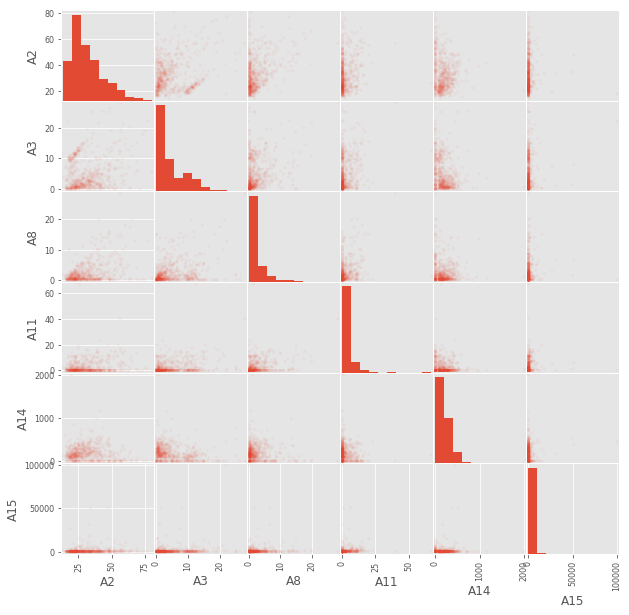

In [22]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

Из построенных диаграмм видно, что признаки не сильно коррелируют между собой, что впрочем можно также легко установить, посмотрев на корреляционную матрицу. Все ее недиагональные значения по модулю не превосходят 0.4:

In [23]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


Диаграмма рассеяния для А2 и А11

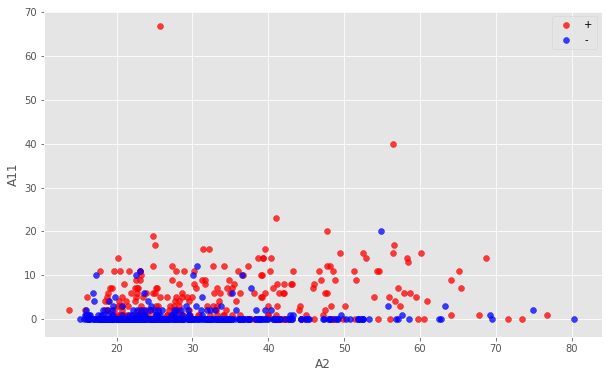

In [24]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

Из диаграммы, в частности, видно, что признак A11 является существенным: как правило, красные точки имеют большое значение этого признака, а синие – маленькое. Иными словами, визуально наблюдается хорошая корреляция между признаками A11 и class. Признак A2, напротив, несет гораздо меньше информации о принадлежности объекта интересующему нас классу.

# Преобразование категориальных признкаов

In [25]:
data.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

Заполним пропуски медианными значениями

In [26]:
data = data.fillna(data.median(axis=0), axis=0)

Заполнение пропусков категориальных значений

In [27]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [28]:
data.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

In [29]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [30]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


Обработка категориальных признаков

In [31]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


Бинарные признаки

In [32]:
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [33]:
data.describe(include = [object])

,A4,A5,A6,A7,A13
count,690,690,690,690,690
unique,3,3,14,9,3
top,u,g,c,v,g
freq,525,525,146,408,625


Небинарные признаки

In [34]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

In [35]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


# Нормализация количественных признаков¶

In [36]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.581751e-15,2.085288e-16,1.879334e-16,2.067589e-16,4.827057e-17,-1.448117e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


Соединяем все в одну таблицу

In [37]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X), а отдельно – выделенный признак (вектор y):

In [38]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
print (feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [39]:
print (X.shape)
print (y.shape)
N, d = X.shape

(690, 42)
(690,)


42 входных признака.

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

483 207


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# kNN – метод ближайших соседей

In [81]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(knn.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(knn.score(X_test, y_test)))

Обучающая выборка: 0.85300
Тестовая выборка: 0.83092
Wall time: 143 ms


from sklearn.grid_search import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(knn.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(knn.score(X_test, y_test)))

Как видим, метод ближайших соседей на этой задаче дает не слишком удовлетворительные результаты.

# SVC – машина опорных векторов

In [82]:
%%time
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(svc.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(svc.score(X_test, y_test)))

Обучающая выборка: 0.85507
Тестовая выборка: 0.86957
Wall time: 59.3 ms


%%time
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print ('CV error    = ', grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(svc.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(svc.score(X_test, y_test)))

# Линейное ядро

from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print ('CV error    = ', grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

In [84]:
%%time
lq = SVC(kernel='linear')
lq.fit(X_train, y_train)
y_train_predict = lq.predict(X_train)
y_test_predict = lq.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(lq.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(lq.score(X_test, y_test)))

Обучающая выборка: 0.85714
Тестовая выборка: 0.88406
Wall time: 49.3 ms


# Полиномиальное ядро

from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)
print ('best degree = ', grid.best_estimator_.degree)

In [85]:
%%time
pq = SVC(kernel='poly')
pq.fit(X_train, y_train)
y_train_predict = pq.predict(X_train)
y_test_predict = pq.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(pq.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(pq.score(X_test, y_test)))

Обучающая выборка: 0.60041
Тестовая выборка: 0.65700
Wall time: 71.5 ms


# Случайный лес

In [86]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(rf.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(rf.score(X_test, y_test)))

Обучающая выборка: 1.00000
Тестовая выборка: 0.89855
Wall time: 352 ms


# Логистическая регрессия

In [87]:
%%time
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(lr.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(lr.score(X_test, y_test)))

Обучающая выборка: 0.87578
Тестовая выборка: 0.90338
Wall time: 12.9 ms


# Адаптивный бустинг

In [88]:
%%time
from sklearn import ensemble
ab = ensemble.AdaBoostClassifier()
ab.fit(X_train, y_train)
y_train_predict = ab.predict(X_train)
y_test_predict = ab.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(ab.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(ab.score(X_test, y_test)))

Обучающая выборка: 0.91304
Тестовая выборка: 0.86473
Wall time: 191 ms


# Градиентный бустинг

In [89]:
%%time
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier()
gbt.fit(X_train, y_train)
y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(gbt.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(gbt.score(X_test, y_test)))

Обучающая выборка: 0.97516
Тестовая выборка: 0.89855
Wall time: 219 ms


# Деревья решений

In [90]:
%%time
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_train_predict = tr.predict(X_train)
y_test_predict = tr.predict(X_test)

print('Обучающая выборка: {:.5f}'.format(tr.score(X_train, y_train)))
print('Тестовая выборка: {:.5f}'.format(tr.score(X_test, y_test)))

Обучающая выборка: 1.00000
Тестовая выборка: 0.81643
Wall time: 10.2 ms


# Сравнительный анализ

In [51]:
lst = (knn.score(X_test, y_test), svc.score(X_test, y_test), lq.score(X_test, y_test),
       pq.score(X_test, y_test), rf.score(X_test, y_test), lr.score(X_test, y_test),
       ab.score(X_test, y_test), gbt.score(X_test, y_test), tr.score(X_test, y_test))

In [52]:
lst

(0.8309178743961353,
 0.8695652173913043,
 0.8840579710144928,
 0.6570048309178744,
 0.8985507246376812,
 0.9033816425120773,
 0.8647342995169082,
 0.8985507246376812,
 0.8164251207729468)

In [53]:
pd10 = pd.DataFrame({'employee': ['kNN', 'SVC', 'lq', 'pq', 'rf', 'lr', 'ab', 'gbt', 'tr'],
                    'group': lst})

In [54]:
pd10

,employee,group
0,kNN,0.830918
1,SVC,0.869565
2,lq,0.884058
3,pq,0.657005
4,rf,0.898551
5,lr,0.903382
6,ab,0.864734
7,gbt,0.898551
8,tr,0.816425


In [55]:
x = pd10['group']

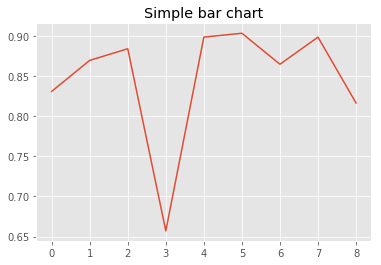

In [56]:
fig = plt.figure()
plt.plot(x)
plt.title('Simple bar chart')
plt.grid(True)   # линии вспомогательной сетки

In [57]:
pd10['group'].max()

0.9033816425120773

# Оптимизация подходящей модели

In [61]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(linear_model.LogisticRegression(penalty='l2'), param_grid)

In [69]:
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [71]:
fold = KFold(len(y), n_folds=5, shuffle=True, random_state=777)

In [77]:
grid = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg']
}
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=1e-4)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=fold)
gs.fit(X, y)

print ('gs.best_score_:', gs.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


gs.best_score_: 0.9292509354685489


In [78]:
searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10)))
    ,penalty='l2'
    ,scoring='roc_auc'
    ,cv=fold
    ,random_state=777
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,tol=1e-4
)
searchCV.fit(X, y)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max()) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Max auc_roc: 0.9292509354685489


Путем модернизации были найдены гиперпараметры приводящие к максимальной точности модели Логистической регрессии. Итоговая точность составила 92.92509%.
В ходе работы были иследованы методы предворительной подготовки и анализа данных для моделей машинного обучения. При подборе максимально точной модели, было использовано 9 методов машинного обучения. Итоговым решением для выбора подходящей модели было определение ключевых параметров(Время обучения, точность на тестовой выборке).
По итогам работы были расширены знания в библиотеке sklearn, а также на практике были отработаны основные приемы работы с библиотекой.